# Sentiment Analysis

_Artificial Intelligence Nanodegree Program | Natural Language Processing_

---

With the rise of online social media platforms like Twitter, Facebook and Reddit, and the proliferation of customer reviews on sites like Amazon and Yelp, we now have access, more than ever before, to massive text-based data sets! They can be analyzed in order to determine how large portions of the population feel about certain products, events, etc. This sort of analysis is called _sentiment analysis_. In this notebook you will build an end-to-end sentiment classification system from scratch.

## Instructions

Some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this notebook. You will not need to modify the included code beyond what is requested. Sections that begin with '**TODO**' in the header indicate that you need to complete or implement some portion within them. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `# TODO: ...` comment. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions for you to answer which relate to the task and your implementation. Each section where you will answer a question is preceded by a '**Question:**' header. Carefully read each question and provide your answer below the '**Answer:**' header by editing the Markdown cell.

> **Note**: Code and Markdown cells can be executed using the **Shift+Enter** keyboard shortcut. In addition, a cell can be edited by typically clicking it (double-click for Markdown cells) or by pressing **Enter** while it is highlighted.

## Step 1: Exploring the data!

The dataset we are going to use is very popular among researchers in Natural Language Processing, usually referred to as the [IMDb dataset](http://ai.stanford.edu/~amaas/data/sentiment/). It consists of movie reviews from the website [imdb.com](http://www.imdb.com/), each labeled as either '**pos**itive', if the reviewer enjoyed the film, or '**neg**ative' otherwise.

> Maas, Andrew L., et al. [Learning Word Vectors for Sentiment Analysis](http://ai.stanford.edu/~amaas/data/sentiment/). In _Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies_. Association for Computational Linguistics, 2011.

We have provided the dataset for you. You can load it in by executing the Python cell below.

In [1]:
import os
import glob

def read_imdb_data(data_dir='data/imdb-reviews'):
    """Read IMDb movie reviews from given directory.
    
    Directory structure expected:
    - data/
        - train/
            - pos/
            - neg/
        - test/
            - pos/
            - neg/
    
    """

    # Data, labels to be returned in nested dicts matching the dir. structure
    data = {}
    labels = {}

    # Assume 2 sub-directories: train, test
    for data_type in ['train', 'test']:
        data[data_type] = {}
        labels[data_type] = {}

        # Assume 2 sub-directories for sentiment (label): pos, neg
        for sentiment in ['pos', 'neg']:
            data[data_type][sentiment] = []
            labels[data_type][sentiment] = []
            
            # Fetch list of files for this sentiment
            path = os.path.join(data_dir, data_type, sentiment, '*.txt')
            files = glob.glob(path)
            
            # Read reviews data and assign labels
            for f in files:
                with open(f, encoding="utf8") as review:
                    data[data_type][sentiment].append(review.read())
                    labels[data_type][sentiment].append(sentiment)
            
            assert len(data[data_type][sentiment]) == len(labels[data_type][sentiment]), \
                    "{}/{} data size does not match labels size".format(data_type, sentiment)
    
    # Return data, labels as nested dicts
    return data, labels


data, labels = read_imdb_data()
print("IMDb reviews: train = {} pos / {} neg, test = {} pos / {} neg".format(
        len(data['train']['pos']), len(data['train']['neg']),
        len(data['test']['pos']), len(data['test']['neg'])))

IMDb reviews: train = 12500 pos / 12500 neg, test = 12500 pos / 12500 neg


In [2]:
data['train']['pos'][0]

'Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!'

Now that the data is loaded in, let's take a quick look at one of the positive reviews:

In [3]:
print(data['train']['pos'][2])

Brilliant over-acting by Lesley Ann Warren. Best dramatic hobo lady I have ever seen, and love scenes in clothes warehouse are second to none. The corn on face is a classic, as good as anything in Blazing Saddles. The take on lawyers is also superb. After being accused of being a turncoat, selling out his boss, and being dishonest the lawyer of Pepto Bolt shrugs indifferently "I'm a lawyer" he says. Three funny words. Jeffrey Tambor, a favorite from the later Larry Sanders show, is fantastic here too as a mad millionaire who wants to crush the ghetto. His character is more malevolent than usual. The hospital scene, and the scene where the homeless invade a demolition site, are all-time classics. Look for the legs scene and the two big diggers fighting (one bleeds). This movie gets better each time I see it (which is quite often).


And one with a negative sentiment:

In [4]:
print(data['train']['neg'][2])

This film lacked something I couldn't put my finger on at first: charisma on the part of the leading actress. This inevitably translated to lack of chemistry when she shared the screen with her leading man. Even the romantic scenes came across as being merely the actors at play. It could very well have been the director who miscalculated what he needed from the actors. I just don't know.<br /><br />But could it have been the screenplay? Just exactly who was the chef in love with? He seemed more enamored of his culinary skills and restaurant, and ultimately of himself and his youthful exploits, than of anybody or anything else. He never convinced me he was in love with the princess.<br /><br />I was disappointed in this movie. But, don't forget it was nominated for an Oscar, so judge for yourself.


We can also make a wordcloud visualization of the reviews.

In [5]:
# Installing wordcloud
#!pip install wordcloud

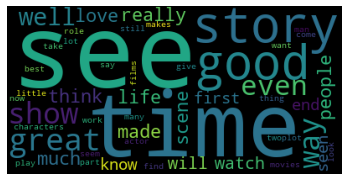

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS

sentiment = 'pos'

# Combine all reviews for the desired sentiment
combined_text = " ".join([review for review in data['train'][sentiment]])

# Initialize wordcloud object
wc = WordCloud(background_color='black', max_words=50,
        # update stopwords to include common words like film and movie
        stopwords = STOPWORDS.update(['br','film','movie','one','character','make']))

# Generate and plot wordcloud
plt.imshow(wc.generate(combined_text))
plt.axis('off')
plt.show()

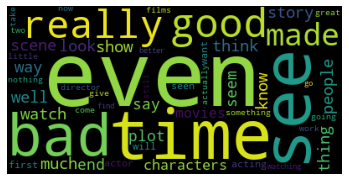

In [7]:
sentiment = 'neg'

# Combine all reviews for the desired sentiment
combined_text = " ".join([review for review in data['train'][sentiment]])

# Initialize wordcloud object
wc = WordCloud(background_color='black', max_words=50,
        # update stopwords to include common words like film and movie
        stopwords = STOPWORDS.update(['br','film','movie','one','character','make']))

# Generate and plot wordcloud
plt.imshow(wc.generate(combined_text))
plt.axis('off')
plt.show()

Try changing the sentiment to `'neg'` and see if you can spot any obvious differences between the wordclouds.

### TODO: Form training and test sets

Now that you've seen what the raw data looks like, combine the positive and negative documents to get one unified training set and one unified test set.

In [8]:
labels['test']['pos'][0]

'pos'

In [9]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

def prepare_imdb_data(data):
    """Prepare training and test sets from IMDb movie reviews."""
    
    # TODO: Combine positive and negative reviews and labels
    labels_train = labels['train']['pos']+labels['train']['neg']
    labels_test = labels['test']['pos']+labels['test']['neg']
    data_train = data['train']['pos'] + data['train']['neg']
    data_test = data['test']['pos'] + data['test']['neg']
        
    # TODO: Shuffle reviews and corresponding labels within training and test sets
    data_train,labels_train = shuffle(data_train, labels_train, random_state = 0)
    data_test, labels_test = shuffle(data_test, labels_test, random_state = 0)
    
    # Return a unified training data, test data, training labels, test labets
    return data_train, data_test, labels_train, labels_test


data_train, data_test, labels_train, labels_test = prepare_imdb_data(data)
print("IMDb reviews (combined): train = {}, test = {}".format(len(data_train), len(data_test)))

IMDb reviews (combined): train = 25000, test = 25000


In [10]:
data_test[0]

"'The Shining' has wit, visual flair and an iconic performance by Jack Nicholson. 'Ausentes,' however, has none of these things; although it does borrow from its classic forebear; to wit, a man hacking through a door and a woman running around shrieking while clutching a huge kitchen knife. Unlike Stanley Kubrick's great psychological horror film, 'Ausentes' is a work which resonates with a singular lack of genius. It is magnificently, comically awful; it makes the Spice Girls movie look like a work of vital art. 'Ausentes' is the tale of a family that moves to a gated community in the suburbs. All is to be well with the world. They will live in peace and tranquillity; they will calmly go about their business away from those mean old city streets. But no. Ariadna Gill's character Julia starts getting spooked by those things that insist on going bump in the night, by empty supermarkets and doors that close themselves; and her husband Samuel, played by Jordi Molla, switches in an instant

In [11]:
print(labels_test[:10])

['neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'pos', 'neg']


## Step 2. Preprocessing

As you might have noticed in the sample reviews, our raw data includes HTML. Therefore there are HTML tags that need to be removed. We also need to remove non-letter characters, normalize uppercase letters by converting them to lowercase, tokenize, remove stop words, and stem the remaining words in each document.

### TODO: Convert each review to words

As your next task, you should complete the function `review_to_words()` that performs all these steps. For your convenience, in the Python cell below we provide you with all the libraries that you may need in order to accomplish these preprocessing steps. Make sure you can import all of them! (If not, pip install from a terminal and run/import again.)

In [12]:
# BeautifulSoup to easily remove HTML tags
from bs4 import BeautifulSoup 

# RegEx for removing non-letter characters
import re

# NLTK library for the remaining steps
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download("stopwords")   # download list of stopwords (only once; need not run it again)
from nltk.corpus import stopwords # import stopwords

from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import *
stemmer = PorterStemmer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lveys\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lveys\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lveys\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
def review_to_words(review):
    """Convert a raw review string into a sequence of words."""
    
    # TODO: Remove HTML tags and non-letters,
    #       convert to lowercase, tokenize,
    #       remove stopwords and stem
    
    # Remove HTML tags using Beautiful Soup library
    soup = BeautifulSoup(review, "html5lib")
    review = soup.get_text().strip()
    
    # Remove punctuation characters
    review = re.sub(r"[^a-zA-Z0-9]", " ", review)
    
    # Convert to lowercase
    review = review.lower()

    # Split text into words using NLTK
    words = word_tokenize(review)          # better alternative to python text.split()
    
    # Remove stop words
    words = [w for w in words if w not in stopwords.words("english")]
    
    # Reduce words to their root form
    words = [WordNetLemmatizer().lemmatize(w) for w in words]
    
    # Lemmatize verbs by specifying pos
    words = [WordNetLemmatizer().lemmatize(w, pos='v') for w in words]   

    # Reduce words to their stems
    words = [PorterStemmer().stem(w) for w in words]

    # Return final list of words
    return words


review_to_words("""This is just a <em>test</em>.<br/><br />
But if it wasn't a test, it would make for a <b>Great</b> movie review!""")

['test', 'test', 'would', 'make', 'great', 'movi', 'review']

With the function `review_to_words()` fully implemeneted, we can apply it to all reviews in both training and test datasets. This may take a while, so let's build in a mechanism to write to a cache file and retrieve from it later.

In [14]:
import pickle

cache_dir = os.path.join("cache", "sentiment_analysis")  # where to store cache files
os.makedirs(cache_dir, exist_ok=True)  # ensure cache directory exists

def preprocess_data(data_train, data_test, labels_train, labels_test,
                    cache_dir=cache_dir, cache_file="preprocessed_data.pkl"):
    """Convert each review to words; read from cache if available."""

    # If cache_file is not None, try to read from it first
    cache_data = None
    if cache_file is not None:
        try:
            with open(os.path.join(cache_dir, cache_file), "rb") as f:
                cache_data = pickle.load(f)
            print("Read preprocessed data from cache file:", cache_file)
        except:
            pass  # unable to read from cache, but that's okay
    
    # If cache is missing, then do the heavy lifting
    if cache_data is None:
        # Preprocess training and test data to obtain words for each review
        words_train = list(map(review_to_words, data_train))
        words_test = list(map(review_to_words, data_test))
        
        # Write to cache file for future runs
        if cache_file is not None:
            cache_data = dict(words_train=words_train, words_test=words_test,
                              labels_train=labels_train, labels_test=labels_test)
            with open(os.path.join(cache_dir, cache_file), "wb") as f:
                pickle.dump(cache_data, f)
            print("Wrote preprocessed data to cache file:", cache_file)
    else:
        # Unpack data loaded from cache file
        words_train, words_test, labels_train, labels_test = (cache_data['words_train'],
                cache_data['words_test'], cache_data['labels_train'], cache_data['labels_test'])
    
    return words_train, words_test, labels_train, labels_test


# Preprocess data
words_train, words_test, labels_train, labels_test = preprocess_data(
        data_train, data_test, labels_train, labels_test)

# Take a look at a sample
print("\n--- Raw review ---")
print(data_train[1])
print("\n--- Preprocessed words ---")
print(words_train[1])
print("\n--- Label ---")
print(labels_train[1])

Read preprocessed data from cache file: preprocessed_data.pkl

--- Raw review ---
You better see this episode from the beginning, because if you start to watch it any later, you will be confused as to what is happening to Clark's life.<br /><br />Yet, that is the twist; Clark is stuck in an alternate reality. Lana is devoted to him. Lex lost most of his legs and is in a wheelchair due to the bridge accident when he swerved to miss Clark in the pilot of the series. Martha is married to Lionel. About the only constant is his most loyal friend Chloe, who still believes in who he is. And, oh yeah, he doesn't have any superpowers. He is in a mental institution for putting himself in a fantasy world where he does have powers, and is ridiculed for believing so. Aside from Chloe, there is one mysterious figure who believes in Clark: a black man who in the alternate reality is also a resident of the institution, who believes he is from Mars.<br /><br />Clark must stay true to everything he beli

## Step 3: Extracting Bag-of-Words features

Now that each document has been preprocessed, we can transform each into a Bag-of-Words feature representation. Note that we need to create this transformation based on the training data alone, as we are not allowed to peek at the testing data at all!

The dictionary or _vocabulary_ $V$ (set of words shared by documents in the training set) used here will be the one on which we train our supervised learning algorithm. Any future test data must be transformed in the same way for us to be able to apply the learned model for prediction. Hence, it is important to store the transformation / vocabulary as well.

> **Note**: The set of words in the training set may not be exactly the same as the test set. What do you do if you encounter a word during testing that you haven't seen before? Unfortunately, we'll have to ignore it, or replace it with a special `<UNK>` token.

### TODO: Compute Bag-of-Words features

Implement the `extract_BoW_features()` function, apply it to both training and test datasets, and store the results in `features_train` and `features_test` NumPy arrays, respectively. Choose a reasonable vocabulary size, say $|V| = 5000$, and keep only the top $|V|$ occuring words and discard the rest. This number will also serve as the number of columns in the BoW matrices.

> **Hint**: You may find it useful to take advantage of `CountVectorizer` from scikit-learn. Also make sure to pickle your Bag-of-Words transformation so that you can use it in future.

In [15]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.externals import joblib
import joblib
# joblib is an enhanced version of pickle that is more efficient for storing NumPy arrays

def extract_BoW_features(words_train, words_test, vocabulary_size=5000,
                         cache_dir=cache_dir, cache_file="bow_features.pkl"):
    """Extract Bag-of-Words for a given set of documents, already preprocessed into words."""
    
    # If cache_file is not None, try to read from it first
    cache_data = None
    if cache_file is not None:
        try:
            with open(os.path.join(cache_dir, cache_file), "rb") as f:
                cache_data = joblib.load(f)
            print("Read features from cache file:", cache_file)
        except:
            pass  # unable to read from cache, but that's okay
    
    # If cache is missing, then do the heavy lifting
    if cache_data is None:
        # TODO: Fit a vectorizer to training documents and use it to transform them
        # NOTE: Training documents have already been preprocessed and tokenized into words;
        #       pass in dummy functions to skip those steps, e.g. preprocessor=lambda x: x
        vectorizer = CountVectorizer(max_features=vocabulary_size,
                preprocessor=lambda x: x, tokenizer=lambda x: x)  # already preprocessed
        features_train = vectorizer.fit_transform(words_train).toarray()

        # TODO: Apply the same vectorizer to transform the test documents (ignore unknown words)
        features_test = vectorizer.transform(words_test).toarray()
        
        # NOTE: Remember to convert the features using .toarray() for a compact representation
        
        # Write to cache file for future runs (store vocabulary as well)
        if cache_file is not None:
            vocabulary = vectorizer.vocabulary_
            cache_data = dict(features_train=features_train, features_test=features_test,
                             vocabulary=vocabulary)
            with open(os.path.join(cache_dir, cache_file), "wb") as f:
                joblib.dump(cache_data, f)
            print("Wrote features to cache file:", cache_file)
    else:
        # Unpack data loaded from cache file
        features_train, features_test, vocabulary = (cache_data['features_train'],
                cache_data['features_test'], cache_data['vocabulary'])
    
    # Return both the extracted features as well as the vocabulary
    return features_train, features_test, vocabulary


# Extract Bag of Words features for both training and test datasets
features_train, features_test, vocabulary = extract_BoW_features(words_train, words_test)

# Inspect the vocabulary that was computed
print("Vocabulary: {} words".format(len(vocabulary)))

import random
print("Sample words: {}".format(random.sample(list(vocabulary.keys()), 8)))

# Sample
print("\n--- Preprocessed words ---")
print(words_train[5])
print("\n--- Bag-of-Words features ---")
print(features_train[5])
print("\n--- Label ---")
print(labels_train[5])

Read features from cache file: bow_features.pkl
Vocabulary: 5000 words
Sample words: ['recogniz', 'verg', 'imagin', 'turn', 'cloud', 'conveni', 'propaganda', 'sheriff']

--- Preprocessed words ---
['excel', 'reason', 'edison', 'go', 'straight', 'video', 'would', 'land', 'theater', 'crumbl', 'thud', 'movi', 'last', 'entir', 'long', 'peril', 'bore', 'notch', 'lowbrow', 'thank', 'freeman', 'spacey', 'obvious', 'spare', 'two', 'week', 'next', 'film', 'bad', 'guy', 'laughabl', 'action', 'near', 'non', 'exist', 'justin', 'timberlak', 'act', 'hate', 'knock', 'guy', 'sooner', 'realiz', 'pop', 'fort', 'better', 'movi', 'bad', 'mostli', 'like', 'fact', 'cool', 'j', 'give', 'appear', 'shoot', 'lead', 'man', 'deserv', 'unlik', 'fellow', 'musician', 'co', 'star', 'act', 'kevin', 'spacey', 'almost', 'alway', 'enjoy', 'well', 'see', 'gulp', 'sever', 'time', 'chew', 'sceneri', 'freeman', 'abil', 'elev', 'flick', 'three', 'star', 'ten', 'good', 'say', 'do', 'ultim', 'error', 'movi', 'mundan', 'tiresom'

Let's try to visualize the Bag-of-Words feature vector for one of our training documents.

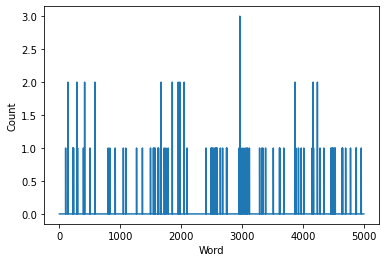

In [16]:
# Plot the BoW feature vector for a training document
plt.plot(features_train[5,:])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

In [17]:
features_train.shape # documents x vocabulary words

(25000, 5000)

In [18]:
print(f'average sparcity of the feature vectors {100-(np.sum(features_train)/features_train.size)*100:.1f}%')

average sparcity of the feature vectors 97.8%


#### Question: Reflecting on Bag-of-Words feature representation

What is the average sparsity level of BoW vectors in our training set? In other words, on average what percentage of entries in a BoW feature vector are zero?

#### Answer: 
<span style='color:blue '> 
98%
</span>
...

### Zipf's law

[Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law), named after the famous American linguist George Zipf, is an empirical law stating that given a large collection of documents, the frequency of any word is inversely proportional to its rank in the frequency table. So the most frequent word will occur about twice as often as the second most frequent word, three times as often as the third most frequent word, and so on. In the figure below we plot number of appearances of each word in our training set against its rank.

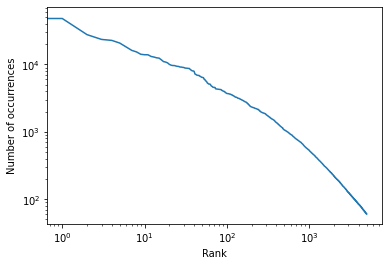

In [19]:
# Find number of occurrences for each word in the training set
word_freq = features_train.sum(axis=0)

# Sort it in descending order
sorted_word_freq = np.sort(word_freq)[::-1]

# Plot 
plt.plot(sorted_word_freq)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.xlabel('Rank')
plt.ylabel('Number of occurrences')
plt.show()

- we see that log(occurence) is almost approaximated by a x log(rank) + b with a negative
- this means occurence is proportional to 1/rank

In [20]:
print('total number of occurrences of the most and second most frequent word', sorted_word_freq[:2])
print('we do not have the first showing twice as much as the second')

total number of occurrences of the most and second most frequent word [51695 48190]
we do not have the first showing twice as much as the second


#### Question: Zipf's law

What is the total number of occurrences of the most frequent word? What is the the total number of occurrences of the second most frequent word? Do your numbers follow  Zipf's law? If not, why?

#### Answer:
<span style='color:blue '> 
- total number of occurrences of the most and second most frequent word [51695 48190]
- we do not have the first showing twice as much as the second so it does not follow Zipf law
- the documents are focusing on a main topic related to movies and therefore are not widely distributed accross the content space

</span>

### TODO: Normalize feature vectors

Bag-of-Words features are intuitive to understand as they are simply word counts. But counts can vary a lot, and potentially throw off learning algorithms later in the pipeline. So, before we proceed further, let's normalize the BoW feature vectors to have unit length.

This makes sure that each document's representation retains the unique mixture of feature components, but prevents documents with large word counts from dominating those with fewer words.

In [21]:
import sklearn.preprocessing as pr

# TODO: Normalize BoW features in training and test set
# normalize(X, norm='l2', *, axis=1, copy=True, return_norm=False)  # standard axis is 1, ie each sample or documents
features_train = pr.normalize(features_train, axis=1)
features_test = pr.normalize(features_test, axis=1)

## Step 4: Classification using BoW features

Now that the data has all been properly transformed, we can feed it into a classifier. To get a baseline model, we train a Naive Bayes classifier from scikit-learn (specifically, [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)), and evaluate its accuracy on the test set.

In [22]:
from sklearn.naive_bayes import GaussianNB

# TODO: Train a Guassian Naive Bayes classifier
clf1 = GaussianNB()
clf1.fit(features_train, labels_train)

# Calculate the mean accuracy score on training and test sets
print("[{}] Accuracy: train = {}, test = {}".format(
        clf1.__class__.__name__,
        clf1.score(features_train, labels_train),
        clf1.score(features_test, labels_test)))

[GaussianNB] Accuracy: train = 0.81844, test = 0.72332


Tree-based algorithms often work quite well on Bag-of-Words as their highly discontinuous and sparse nature is nicely matched by the structure of trees. As your next task, you will try to improve on the Naive Bayes classifier's performance by using scikit-learn's Gradient-Boosted Decision Tree classifer.

### TODO: Gradient-Boosted Decision Tree classifier

Use [`GradientBoostingClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) from scikit-learn to classify the BoW data. This model has a number of parameters. We use default parameters for some of them and pre-set the rest for you, except one: `n_estimators`. Find a proper value for this hyperparameter, use it to classify the data, and report how much improvement you get over Naive Bayes in terms of accuracy.

> **Tip**: Use a model selection technique such as cross-validation, grid-search, or an information criterion method, to find an optimal value for the hyperparameter.

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

n_estimators = 250

def classify_gboost(X_train, X_test, y_train, y_test):        
    # Initialize classifier
    clf = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=1.0, max_depth=1, random_state=0)

    # TODO: Classify the data using GradientBoostingClassifier
    #clf.fit(X_train, y_train)
    
    # TODO(optional): Perform hyperparameter tuning / model selection
    print('Testing range of n_estimators for best model selection....')
    param_grid = {'n_estimators': [250, 300, 400]}
    grid = GridSearchCV(GradientBoostingClassifier(), param_grid, refit=True, verbose=4, n_jobs=-1)
    grid.fit(X_train,y_train)
    print('Best set of parameters found:', grid.best_params_)
    print('Testing best model accuracy with cross validation....')
    clf = grid.best_estimator_
    
    # Applying k-Fold Cross Validation
    #accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
    #print("Gradient Boosting Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))
    print('Evaluating best model accuracy on test set....')
    # TODO: Print final training & test accuracy
    print("[{}] Accuracy: train = {}, test = {}".format(
        clf.__class__.__name__,
        clf.score(X_train, y_train),
        clf.score(X_test, y_test)))
    
    # Return best classifier model
    return clf


clf2 = classify_gboost(features_train, features_test, labels_train, labels_test)

Testing range of n_estimators for best model selection....
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed: 108.6min remaining: 298.7min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed: 124.3min remaining: 108.8min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed: 140.7min remaining: 35.2min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 169.9min finished


Best set of parameters found: {'n_estimators': 400}
Testing best model accuracy with cross validation....
Evaluating best model accuracy on test set....
[GradientBoostingClassifier] Accuracy: train = 0.90328, test = 0.85752


<span style='color:blue '>
    
- Best model found with n_estimators = 400
- note that Accuracy: train = 0.88164, test = 0.84868 with n_estimators = 250 (faster).
    
</span>

In [116]:
# Save to file in the current working directory
pkl_filename = "GradientBoosting_model.pkl"

with open(os.path.join(cache_dir, pkl_filename), 'wb') as file:
    pickle.dump(clf2, file)

# Load from file
#with open(os.path.join(cache_dir, pkl_filename), 'rb') as file:
#    clf2 = pickle.load(file)    

In [ ]:
# Alternative
from sklearn.externals import joblib

# Save to file in the current working directory
#joblib_file = "joblib_model.pkl"
#joblib.dump(model, joblib_file)

# Load from file
#joblib_model = joblib.load(joblib_file)

In [82]:
def inference(index, review, true_sentiment, model):
    words = list(review_to_words(review))
    vectorizer = CountVectorizer(vocabulary=vocabulary,
                preprocessor=lambda x: x, tokenizer=lambda x: x)  # already preprocessed
    features = vectorizer.transform([words]).toarray()
    features = pr.normalize(features)
    print(f'--- Review n°{index} ---\n', review)
    #print()
    #print('--- Preprocessed word tokens ---\n', words)
    print()
    print('--- Prediction ---')
    print('True sentiment:', true_sentiment,'\tPredicted sentiment',
      model.predict(features),'by', model.__class__.__name__)

In [83]:
index = random.choice(range(len(data_test)))
inference(index, data_test[index], labels_test[index], clf2)

--- Review n°1021 ---
 I was given the solo "Summertime" in 5th grade for our spring choral concert. From that time on, a great appreciation for Gershwin's music arose in me. I love the haunting melodies of this opera by Gershwin. Back when I was in 5th grade (around age 10), I got the LP to practice with and also love the soundtrack very much. I recommend seeing this movie and if you can get the soundtrack, get it - you can sometimes find it on eBay - an old, used LP. I have been searching and searching to try to find the soundtrack on CD. The songs on this have marvelous musical arrangements and I truly wish it would be put on CD for purchase and also wish they would restore the movie and put it on DVD. This is truly a great work that I think present and future generations would enjoy and benefit from. Some may think the movie slow and dull, but I find it quite the contrary. Although Poitier and Dandridge have dubbed musical voices, I think the voices fit the faces and personalities 

### TODO: Adverserial testing

Write a short movie review to trick your machine learning model! That is, a movie review with a clear positive or negative sentiment that your model will classify incorrectly.

> **Hint**: You might want to take advantage of the biggest weakness of the Bag-of-Words scheme!

In [84]:
# TODO: Write a sample review and set its true sentiment
my_review = "Although I do not like this film director and I was very disappointed by his previous movies, I have to admit his last movie is not as bad as the others"
true_sentiment = 'pos'  # sentiment must be 'pos' or 'neg'

# TODO: Apply the same preprocessing and vectorizing steps as you did for your training data
words = list(review_to_words(my_review))
vectorizer = CountVectorizer(vocabulary=vocabulary,
                preprocessor=lambda x: x, tokenizer=lambda x: x)  # already preprocessed
my_features = vectorizer.transform([words]).toarray()
my_features = pr.normalize(my_features)

# TODO: Then call your classifier to label it
print('--- My review ---\n', my_review)
print()
print('--- Preprocessed word tokens ---\n', words)
print()
# TODO: Then call your classifier to label it
print('--- Prediction ---')
print('True sentiment:', true_sentiment,'\tPredicted sentiment',
      clf1.predict(my_features),'by', clf1.__class__.__name__)
print('True sentiment:', true_sentiment,'\tPredicted sentiment', 
      clf2.predict(my_features), 'by', clf2.__class__.__name__)

--- My review ---
 Although I do not like this film director and I was very disappointed by his previous movies, I have to admit his last movie is not as bad as the others

--- Preprocessed word tokens ---
 ['although', 'like', 'film', 'director', 'disappoint', 'previou', 'movi', 'admit', 'last', 'movi', 'bad', 'other']

--- Prediction ---
True sentiment: pos 	Predicted sentiment ['neg'] by GaussianNB
True sentiment: pos 	Predicted sentiment ['neg'] by GradientBoostingClassifier


In [85]:
my_review = "This is a great movie, it is not bad at all"
true_sentiment = 'pos'  # sentiment must be 'pos' or 'neg'

# TODO: Apply the same preprocessing and vectorizing steps as you did for your training data
words = list(review_to_words(my_review))
vectorizer = CountVectorizer(vocabulary=vocabulary,
                preprocessor=lambda x: x, tokenizer=lambda x: x)  # already preprocessed
my_features = vectorizer.transform([words]).toarray()
my_features = pr.normalize(my_features)

# TODO: Then call your classifier to label it
print('--- My review ---\n', my_review)
print()
print('--- Preprocessed word tokens ---\n', words)
print()
# TODO: Then call your classifier to label it
print('--- Prediction ---')
print('True sentiment:', true_sentiment,'\tPredicted sentiment',
      clf1.predict(my_features),'by', clf1.__class__.__name__)
print('True sentiment:', true_sentiment,'\tPredicted sentiment', 
      clf2.predict(my_features), 'by', clf2.__class__.__name__)

--- My review ---
 This is a great movie, it is not bad at all

--- Preprocessed word tokens ---
 ['great', 'movi', 'bad']

--- Prediction ---
True sentiment: pos 	Predicted sentiment ['neg'] by GaussianNB
True sentiment: pos 	Predicted sentiment ['pos'] by GradientBoostingClassifier


In [86]:
my_review = "This is a bad movie, it is not great at all"
true_sentiment = 'neg'  # sentiment must be 'pos' or 'neg'

# TODO: Apply the same preprocessing and vectorizing steps as you did for your training data
words = list(review_to_words(my_review))
vectorizer = CountVectorizer(vocabulary=vocabulary,
                preprocessor=lambda x: x, tokenizer=lambda x: x)  # already preprocessed
my_features = vectorizer.transform([words]).toarray()
my_features = pr.normalize(my_features)

# TODO: Then call your classifier to label it
print('--- My review ---\n', my_review)
print()
print('--- Preprocessed word tokens ---\n', words)
print()
# TODO: Then call your classifier to label it
print('--- Prediction ---')
print('True sentiment:', true_sentiment,'\tPredicted sentiment',
      clf1.predict(my_features),'by', clf1.__class__.__name__)
print('True sentiment:', true_sentiment,'\tPredicted sentiment', 
      clf2.predict(my_features), 'by', clf2.__class__.__name__)

--- My review ---
 This is a bad movie, it is not great at all

--- Preprocessed word tokens ---
 ['bad', 'movi', 'great']

--- Prediction ---
True sentiment: neg 	Predicted sentiment ['neg'] by GaussianNB
True sentiment: neg 	Predicted sentiment ['pos'] by GradientBoostingClassifier


## Extensions

There are several ways in which you can build upon this notebook. Each comes with its set of challenges, but can be a rewarding experience.

- The first thing is to try and improve the accuracy of your model by experimenting with different architectures, layers and parameters. How good can you get without taking prohibitively long to train? How do you prevent overfitting?

- Then, you may want to deploy your model as a mobile app or web service. What do you need to do in order to package your model for such deployment? How would you accept a new review, convert it into a form suitable for your model, and perform the actual prediction? (Note that the same environment you used during training may not be available.)

- One simplification we made in this notebook is to limit the task to binary classification. The dataset actually includes a more fine-grained review rating that is indicated in each review's filename (which is of the form `<[id]_[rating].txt>` where `[id]` is a unique identifier and `[rating]` is on a scale of 1-10; note that neutral reviews > 4 or < 7 have been excluded). How would you modify the notebook to perform regression on the review ratings? In what situations is regression more useful than classification, and vice-versa?

Whatever direction you take, make sure to share your results and learnings with your peers, through blogs, discussions and participating in online competitions. This is also a great way to become more visible to potential employers!

# Sentiment Analysis Part 2

_Natural Langauge Processing Nanodegree Program_

---



## Step 5: Switching gears - RNNs

We just saw how the task of sentiment analysis can be solved via a traditional machine learning approach: BoW + a nonlinear classifier. We now switch gears and use Recurrent Neural Networks, and in particular LSTMs, to perform sentiment analysis in Keras. Conveniently, Keras has a built-in [IMDb movie reviews dataset](https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification) that we can use, with the same vocabulary size.

In [207]:
from keras.datasets import imdb  # import the built-in imdb dataset in Keras

# Set the vocabulary size
vocabulary_size = 5000

# Load in training and test data (note the difference in convention compared to scikit-learn)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocabulary_size)
print("Loaded dataset with {} training samples, {} test samples".format(len(X_train), len(X_test)))

Loaded dataset with 25000 training samples, 25000 test samples


In [208]:
# Inspect a sample review and its label
print("--- Review ---")
print(X_train[5])
print("--- Label ---")
print(y_train[5])

--- Review ---
[1, 778, 128, 74, 12, 630, 163, 15, 4, 1766, 2, 1051, 2, 32, 85, 156, 45, 40, 148, 139, 121, 664, 665, 10, 10, 1361, 173, 4, 749, 2, 16, 3804, 8, 4, 226, 65, 12, 43, 127, 24, 2, 10, 10]
--- Label ---
0


In [209]:
# Map word IDs back to words
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print("--- Review (with words) ---")
print([id2word.get(i, " ") for i in X_train[5]])
print("--- Label ---")
print(y_train[5])

--- Review (with words) ---
['the', 'effort', 'still', 'been', 'that', 'usually', 'makes', 'for', 'of', 'finished', 'and', 'ended', 'and', 'an', 'because', 'before', 'if', 'just', 'though', 'something', 'know', 'novel', 'female', 'i', 'i', 'slowly', 'lot', 'of', 'above', 'and', 'with', 'connect', 'in', 'of', 'script', 'their', 'that', 'out', 'end', 'his', 'and', 'i', 'i']
--- Label ---
0


In [210]:
print(f'Training set review length: minimum {min([len(X_train[i]) for i in range(len(X_train))])} \tmaximum {max([len(X_train[i]) for i in range(len(X_train))])}')

Training set review length: minimum 11 	maximum 2494


Unlike our Bag-of-Words approach, where we simply summarized the counts of each word in a document, this representation essentially retains the entire sequence of words (minus punctuation, stopwords, etc.). This is critical for RNNs to function. But it also means that now the features can be of different lengths!

#### Question: Variable length reviews

What is the maximum review length (in terms of number of words) in the training set? What is the minimum?

#### Answer:
<span style='color:blue '> 
...minimum 11 	maximum 2494
</span>

### TODO: Pad sequences

In order to feed this data into your RNN, all input documents must have the same length. Let's limit the maximum review length to `max_words` by truncating longer reviews and padding shorter reviews with a null value (0). You can accomplish this easily using the [`pad_sequences()`](https://keras.io/preprocessing/sequence/#pad_sequences) function in Keras. For now, set `max_words` to 500.

In [211]:
from keras.preprocessing import sequence

# Set the maximum number of words per document (for both training and testing)
max_words = 500

# TODO: Pad sequences in X_train and X_test
X_train = sequence.pad_sequences(X_train, maxlen= max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)

In [212]:
y_train.shape

(25000,)

In [213]:
X_train.shape

(25000, 500)

In [214]:
X_train[0].dtype

dtype('int32')

In [215]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

TODO: Design an RNN model for sentiment analysis
Build your model architecture in the code cell below. We have imported some layers from Keras that you might need but feel free to use any other layers / transformations you like.

Remember that your input is a sequence of words (technically, integer word IDs) of maximum length = max_words, and your output is a binary sentiment label (0 or 1).

In [228]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

# TODO: Design your model
model = Sequential()
model.add(Embedding(input_dim = vocabulary_size, output_dim = 64, input_length=max_words))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(units = 1, activation='sigmoid', kernel_initializer="glorot_uniform"))

print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 500, 64)           320000    
_________________________________________________________________
bidirectional_7 (Bidirection (None, 500, 64)           24832     
_________________________________________________________________
bidirectional_8 (Bidirection (None, 64)                24832     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 369,729
Trainable params: 369,729
Non-trainable params: 0
_________________________________________________________________
None


#### Question: Architecture and parameters

Briefly describe your neural net architecture. How many model parameters does it have that need to be trained?

#### Answer:

...

### TODO: Train and evaluate your model

Now you are ready to train your model. In Keras world, you first need to _compile_ your model by specifying the loss function and optimizer you want to use while training, as well as any evaluation metrics you'd like to measure. Specify the approprate parameters, including at least one metric `'accuracy'`.

In [229]:
# TODO: Compile your model, specifying a loss function, optimizer, and metrics
import keras
import tensorflow as tf
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

Once compiled, you can kick off the training process. There are two important training parameters that you have to specify - **batch size** and **number of training epochs**, which together with your model architecture determine the total training time.

Training may take a while, so grab a cup of coffee, or better, go for a hike! If possible, consider using a GPU, as a single training run can take several hours on a CPU.

> **Tip**: You can split off a small portion of the training set to be used for validation during training. This will help monitor the training process and identify potential overfitting. You can supply a validation set to `model.fit()` using its `validation_data` parameter, or just specify `validation_split` - a fraction of the training data for Keras to set aside for this purpose (typically 5-10%). Validation metrics are evaluated once at the end of each epoch.

In [230]:
from sklearn.model_selection import train_test_split

# TODO: Specify training parameters: batch size and number of epochs
batch_size = 64
num_epochs = 2

# TODO(optional): Reserve/specify some training data for validation (not to be used for training)
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0, shuffle=True)

# TODO: Train your model
print("Fit model on training data")
history = model.fit(X_train2, y_train2, batch_size= batch_size, epochs= num_epochs, validation_data= (X_val, y_val))

Fit model on training data


C:\Users\lveys\anaconda3\envs\nlp_py37\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 22500 samples, validate on 2500 samples
Epoch 1/2
22500/22500 [==============================] - 394s 18ms/step - loss: 0.4133 - accuracy: 0.8052 - val_loss: 0.3837 - val_accuracy: 0.8280
Epoch 2/2
22500/22500 [==============================] - 394s 18ms/step - loss: 0.2445 - accuracy: 0.9050 - val_loss: 0.2914 - val_accuracy: 0.8824


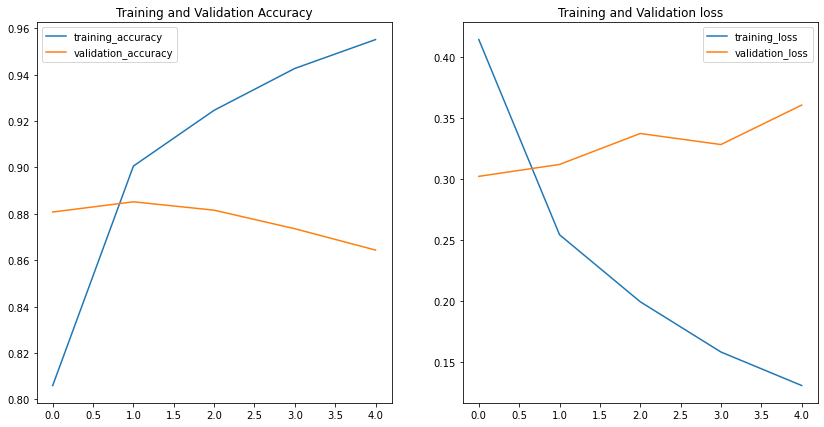

In [225]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(num_epochs)

plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='training_accuracy')
plt.plot(epochs_range, val_acc, label='validation_accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='training_loss')
plt.plot(epochs_range, val_loss, label='validation_loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')
plt.show()


In [232]:
# Save your model, so that you can quickly load it in future (and perhaps resume training)
model_file = "bilstm_model.h5"  # HDF5 file
model.save(os.path.join(cache_dir, model_file))

# load model file
#from keras.models import load_model
#model = load_model(os.path.join(cache_dir, model_file))

Once you have trained your model, it's time to see how well it performs on unseen test data.

In [231]:
# Evaluate your model on the test set
scores = model.evaluate(X_test, y_test, verbose=0)  # returns loss and other metrics specified in model.compile()
print("Test accuracy:", scores[1])  # scores[1] should correspond to accuracy if you passed in metrics=['accuracy']

Test accuracy: 0.8776800036430359


#### Question: Comparing RNNs and Traditional Methods

How well does your RNN model perform compared to the BoW + Gradient-Boosted Decision Trees?

#### Answer:

<span style='color:blue '>
    
TEST ACCURACY
    
- 72.3%   <== BoW GaussianNB Classifier
- 85.8%   <== GradientBoostingDecisionTree
- 87.3%   <== RNN (simple RNN with embedding 32, LSTM dim 100 and dense output layer - 213k param)
- 87.8%   <== Bi-directional LSTM

Although rudimentary, the RNN outperforms both regular classifiers. It is well above Naive Bayes classifier, and a few pct points above Gradient Boosted Tree. These two regular classifiers use BoW vectors not taking into account the sequence of the words.
    
The Bi-directional LSTM shows the highest accuracy. Like the simple RNN, it takes as input the sequence of words, allowing to capture more of the context vs regular classifiers. In addition, it is able to get information from past (backwards) and future (forward) states simultaneously (unlike a simple unidirectional LSTM which only leverages information of the past because the only inputs it has seen so far are from the past). The Bi-directional LSTM can see the past and future context of the word (influence of neighboring words go both ways) and is much better suited to capture more complex contextual information. 
    
    
RNN shows the highest accuracy, well above Naive Bayes classifier, and a few pct points better than GradientBoosting. These two regular classifiers use BoW vectors not taking into account the sequence of the words. 

Although rudimentary, the RNN outperforms both. The RNN takes as input the sequence of words, allowing to capture more of the context.
             
</span>

In [135]:
def review_to_words_rnn(review):
    """Convert a raw review string into a sequence of words."""
    
    # TODO: Remove HTML tags and non-letters,
    #       convert to lowercase, tokenize,
    #       remove stopwords and stem
    
    # Remove HTML tags using Beautiful Soup library
    soup = BeautifulSoup(review, "html5lib")
    review = soup.get_text().strip()
    
    # Remove punctuation characters
    review = re.sub(r"[^a-zA-Z0-9]", " ", review)
    
    # Convert to lowercase
    review = review.lower()

    # Split text into words using NLTK
    words = word_tokenize(review)          # better alternative to python text.split()
    
    # Remove stop words
    words = [w for w in words if w not in stopwords.words("english")]

    # Return final list of words
    return words

In [188]:
def inference_rnn(review):
    print("--- Review (with words) ---")
    print(review)
    print("--- Tokens ---")
    print(review_to_words_rnn(review))
    tokens = [word2id.get(i) for i in review_to_words_rnn(review)]
    print(tokens)
    tokens = sequence.pad_sequences([tokens], maxlen= max_words)
    print("--- Sentiment ---")
    prediction = 'neg'
    if model.predict(tokens)[0][0] > 0.5:
        prediction='pos'
    print('True sentiment:', true_sentiment,'\tPredicted sentiment:',
      prediction,'({:.2f})'.format(model.predict(tokens)[0][0]))
    

In [244]:
my_review = "Although I do not like this film director and I was very disappointed by his previous movies, I have to admit his last movie is not as bad as the others"
true_sentiment = 'pos'  # sentiment must be 'pos' or 'neg'
inference_rnn(my_review)

--- Review (with words) ---
Although I do not like this film director and I was very disappointed by his previous movies, I have to admit his last movie is not as bad as the others
--- Tokens ---
['although', 'like', 'film', 'director', 'disappointed', 'previous', 'movies', 'admit', 'last', 'movie', 'bad', 'others']
[258, 37, 19, 164, 682, 957, 99, 971, 233, 17, 75, 406]
--- Sentiment ---
True sentiment: pos 	Predicted sentiment: neg (0.37)


In [234]:
my_review = "This is a great movie, it is not bad at all."
true_sentiment = 'pos'  # sentiment must be 'pos' or 'neg'
inference_rnn(my_review)

--- Review (with words) ---
This is a great movie, it is not bad at all.
--- Tokens ---
['great', 'movie', 'bad']
[84, 17, 75]
--- Sentiment ---
True sentiment: pos 	Predicted sentiment: pos (0.57)


In [235]:
my_review = "This is a bad movie, it is not great at all."
true_sentiment = 'neg'  # sentiment must be 'pos' or 'neg'
inference_rnn(my_review)

--- Review (with words) ---
This is a bad movie, it is not great at all.
--- Tokens ---
['bad', 'movie', 'great']
[75, 17, 84]
--- Sentiment ---
True sentiment: neg 	Predicted sentiment: pos (0.55)


## Extensions

There are several ways in which you can build upon this notebook. Each comes with its set of challenges, but can be a rewarding experience.

- The first thing is to try and improve the accuracy of your model by experimenting with different architectures, layers and parameters. How good can you get without taking prohibitively long to train? How do you prevent overfitting?

- Then, you may want to deploy your model as a mobile app or web service. What do you need to do in order to package your model for such deployment? How would you accept a new review, convert it into a form suitable for your model, and perform the actual prediction? (Note that the same environment you used during training may not be available.)

- One simplification we made in this notebook is to limit the task to binary classification. The dataset actually includes a more fine-grained review rating that is indicated in each review's filename (which is of the form `<[id]_[rating].txt>` where `[id]` is a unique identifier and `[rating]` is on a scale of 1-10; note that neutral reviews > 4 or < 7 have been excluded). How would you modify the notebook to perform regression on the review ratings? In what situations is regression more useful than classification, and vice-versa?

Whatever direction you take, make sure to share your results and learnings with your peers, through blogs, discussions and participating in online competitions. This is also a great way to become more visible to potential employers!